In [0]:
!pip install opencv --python


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

--python-version option requires 1 argument


In [0]:
!pip install mxnet

    100% |████████████████████████████████| 28.4MB 1.1MB/s 
    100% |████████████████████████████████| 61kB 22.2MB/s 
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
google-colab 1.0.0 has requirement requests~=2.18.0, but you'll have requests 2.21.0 which is incompatible.
fastai 1.0.46 has requirement numpy>=1.15, but you'll have numpy 1.14.6 which is incompatible.
  Found existing installation: requests 2.18.4
    Uninstalling requests-2.18.4:
      Successfully uninstalled requests-2.18.4
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [0]:
!pip install gluoncv

    100% |████████████████████████████████| 245kB 15.7MB/s 


In [0]:
!pwd

/content


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd gdrive/My Drive

/content/gdrive/My Drive


In [0]:
#Loading libraries 
import sys
import os
import mxnet as mx
from mxnet import image
from mxnet.gluon.data.vision import transforms
import gluoncv
from matplotlib import pyplot as plt
from gluoncv.utils.viz import get_color_pallete
import matplotlib.image as mpimg
import numpy as np
import mxnet as mx
from gluoncv import data, utils

In [0]:
#Herw we are using CPU
ctx = mx.cpu()

In [0]:
#Checking output directories are exist or not
import os
import shutil
if (os.path.isdir('outputimgs')):
    shutil.rmtree('outputimgs')
    
if (os.path.isdir('outputimgs')):
    pass
else:
    os.mkdir('outputimgs')

if (os.path.isdir('outputvocimgs')):
    shutil.rmtree('outputvocimgs')
if (os.path.isdir('outputvocimgs')):
    pass
else:
    os.mkdir('outputvocimgs')

In [0]:
#Function to do image Segmentation on ADE dataset
def img_Segmentation_ADE(imgfile):
    print("Input Image Pixels:\t")
    img = image.imread(imgfile)
    print(img)

    print("Normalizing image:\t")
    transform_fn = transforms.Compose([transforms.ToTensor(),transforms.Normalize([.485, .456, .406], [.229, .224, .225])])
    img = transform_fn(img)
    img = img.expand_dims(0).as_in_context(ctx)
    print(img)


    print("Loading Model:.........\t")
    model = gluoncv.model_zoo.get_model('deeplab_resnet101_ade', pretrained=True)
    print("Model details:\t")
    print(model)


    print("Predicting Image using Model:\t")
    print("...........................:")
    output = model.demo(img)
    predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
    mask = get_color_pallete(predict, 'ade20k')
    

    print("Saving Predicted image as outputimg.png:\t")
    outputimg='output'+imgfile.split('.')[0]+'.png'
    mask.save(outputimg)
    return (len(list(np.unique(predict))))

In [0]:
#Created function to do image Segmentation on VOC dataset with DeepLab
def img_Segmentation_VOC(imgfile):
    print("Input Image Pixels:\t")
    img = image.imread(imgfile)
    print(img)

#     print("Showing Input Image:\t")
#     plt.imshow(img.asnumpy())
#     plt.show()

    print("Normalizing image:\t")
    transform_fn = transforms.Compose([transforms.ToTensor(),transforms.Normalize([.485, .456, .406], [.229, .224, .225])])
    img = transform_fn(img)
    img = img.expand_dims(0).as_in_context(ctx)
    print(img)


    print("Loading Model:.........\t")
    model = gluoncv.model_zoo.get_model('deeplab_resnet101_voc', pretrained=True)
    print("Model details:\t")
    print(model)


    print("Predicting Image using Model:\t")
    print("...........................:")
    output = model.demo(img)
    predict = mx.nd.squeeze(mx.nd.argmax(output, 1)).asnumpy()
    mask = get_color_pallete(predict, 'pascal_voc')
    

    print("Saving Predicted image as outputimg.png:\t")
    outputimg='outputvoc'+imgfile.split('.')[0]+'.png'
    print(outputimg)
    mask.save(outputimg)
    return (len(list(np.unique(predict))))
    
    
#     print("Displaying output Image:\t")
# #     mmask = mpimg.imread(outputimg)
# #     #plt.imshow(mmask)
# #     plt.show()


In [0]:
#Calling img_Segmentation_ADE function
import glob
fileswithpath=(glob.glob("imgs/*.*"))
numItems_ade=[]
for imgfile in fileswithpath:
    items=img_Segmentation_ADE(imgfile)
    numItems_ade.append("Numbers Items in img Using ADE dataset "+imgfile+"\t:"+str(items))

Input Image Pixels:	

[[[154 137 130]
  [114  97  90]
  [ 52  35  28]
  ...
  [185 185 183]
  [185 185 183]
  [185 185 183]]

 [[142 125 118]
  [153 136 128]
  [148 131 124]
  ...
  [186 186 184]
  [185 185 183]
  [185 185 183]]

 [[148 131 123]
  [149 132 122]
  [162 145 137]
  ...
  [186 186 184]
  [186 186 184]
  [185 185 183]]

 ...

 [[111 132 159]
  [102 124 148]
  [ 95 115 140]
  ...
  [168 146 135]
  [169 146 138]
  [167 144 136]]

 [[ 81 105 131]
  [ 88 112 136]
  [ 92 114 138]
  ...
  [169 146 138]
  [166 146 139]
  [163 143 136]]

 [[ 61  87 112]
  [ 82 108 131]
  [ 88 110 134]
  ...
  [169 146 138]
  [165 145 138]
  [162 142 135]]]
<NDArray 512x768x3 @cpu(0)>
Normalizing image:	

[[[[ 0.5193082  -0.16568205 -1.2274169  ...  1.0501755   1.0501755
     1.0501755 ]
   [ 0.31381115  0.50218344  0.41655967 ...  1.0673003   1.0501755
     1.0501755 ]
   [ 0.41655967  0.43368444  0.6563062  ...  1.0673003   1.0673003
     1.0501755 ]
   ...
   [-0.2170563  -0.37117907 -0.49105233 

100121KB [00:04, 21170.70KB/s]                           


Model file is not found. Downloading.


100%|██████████| 221969/221969 [00:10<00:00, 21914.82KB/s]


Model details:	
DeepLabV3(
  (conv1): HybridSequential(
    (0): Conv2D(3 -> 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=64)
    (2): Activation(relu)
    (3): Conv2D(64 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=64)
    (5): Activation(relu)
    (6): Conv2D(64 -> 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=128)
  (relu): Activation(relu)
  (maxpool): MaxPool2D(size=(3, 3), stride=(2, 2), padding=(1, 1), ceil_mode=False)
  (layer1): HybridSequential(
    (0): BottleneckV1b(
      (conv1): Conv2D(128 -> 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm(axis=1, eps=1e-05, moment

In [0]:
#Calling img_Segmentation_VOC function
numItems_voc=[]
for imgfile in fileswithpath:
    items=img_Segmentation_VOC(imgfile)
    numItems_voc.append("Numbers Items in img Using VOC dataset "+imgfile+"\t:"+str(items))

Input Image Pixels:	

[[[154 137 130]
  [114  97  90]
  [ 52  35  28]
  ...
  [185 185 183]
  [185 185 183]
  [185 185 183]]

 [[142 125 118]
  [153 136 128]
  [148 131 124]
  ...
  [186 186 184]
  [185 185 183]
  [185 185 183]]

 [[148 131 123]
  [149 132 122]
  [162 145 137]
  ...
  [186 186 184]
  [186 186 184]
  [185 185 183]]

 ...

 [[111 132 159]
  [102 124 148]
  [ 95 115 140]
  ...
  [168 146 135]
  [169 146 138]
  [167 144 136]]

 [[ 81 105 131]
  [ 88 112 136]
  [ 92 114 138]
  ...
  [169 146 138]
  [166 146 139]
  [163 143 136]]

 [[ 61  87 112]
  [ 82 108 131]
  [ 88 110 134]
  ...
  [169 146 138]
  [165 145 138]
  [162 142 135]]]
<NDArray 512x768x3 @cpu(0)>
Normalizing image:	

[[[[ 0.5193082  -0.16568205 -1.2274169  ...  1.0501755   1.0501755
     1.0501755 ]
   [ 0.31381115  0.50218344  0.41655967 ...  1.0673003   1.0501755
     1.0501755 ]
   [ 0.41655967  0.43368444  0.6563062  ...  1.0673003   1.0673003
     1.0501755 ]
   ...
   [-0.2170563  -0.37117907 -0.49105233 

221696KB [00:10, 20645.95KB/s]                            


Model details:	
DeepLabV3(
  (conv1): HybridSequential(
    (0): Conv2D(3 -> 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=64)
    (2): Activation(relu)
    (3): Conv2D(64 -> 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (4): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=64)
    (5): Activation(relu)
    (6): Conv2D(64 -> 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  )
  (bn1): BatchNorm(axis=1, eps=1e-05, momentum=0.9, fix_gamma=False, use_global_stats=False, in_channels=128)
  (relu): Activation(relu)
  (maxpool): MaxPool2D(size=(3, 3), stride=(2, 2), padding=(1, 1), ceil_mode=False)
  (layer1): HybridSequential(
    (0): BottleneckV1b(
      (conv1): Conv2D(128 -> 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm(axis=1, eps=1e-05, moment

In [0]:
#Object Detection
def plot_image(img, ax=None, reverse_rgb=False):
    if ax is None:
            # create new axes
        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
    if isinstance(img, mx.nd.NDArray):
        img = img.asnumpy()
    img = img.copy()
    if reverse_rgb:
        img[:, :, (0, 1, 2)] = img[:, :, (2, 1, 0)]
    ax.imshow(img.astype(np.uint8))

    return ax

In [0]:
def plot_bbox(img, bboxes, scores=None, labels=None, thresh=0.4,
              class_names=None, colors=None, ax=None,
              reverse_rgb=False, absolute_coordinates=True):

    

    if labels is not None and not len(bboxes) == len(labels):
        raise ValueError('The length of labels and bboxes mismatch, {} vs {}'
                         .format(len(labels), len(bboxes)))
    if scores is not None and not len(bboxes) == len(scores):
        raise ValueError('The length of scores and bboxes mismatch, {} vs {}'
                         .format(len(scores), len(bboxes)))

    ax = plot_image(img, ax=ax, reverse_rgb=reverse_rgb)

    if len(bboxes) < 1:
        return ax

    if isinstance(bboxes, mx.nd.NDArray):
        bboxes = bboxes.asnumpy()
    if isinstance(labels, mx.nd.NDArray):
        labels = labels.asnumpy()
    if isinstance(scores, mx.nd.NDArray):
        scores = scores.asnumpy()

    if not absolute_coordinates:
        #convert to absolute coordinates using image shape
        height = img.shape[0]
        width = img.shape[1]
        bboxes[:, (5, 2)] *= width
        bboxes[:, (1, 3)] *= height

    # use random colors if None is provided
    if colors is None:
        colors = dict()
    final_class_names=[]
    for i, bbox in enumerate(bboxes):
        if scores is not None and scores.flat[i] < thresh:
            continue
        if labels is not None and labels.flat[i] < 0:
            continue
        cls_id = int(labels.flat[i]) if labels is not None else -1
        if cls_id not in colors:
            if class_names is not None:
                colors[cls_id] = plt.get_cmap('hsv')(cls_id / len(class_names))
            else:
                colors[cls_id] = (random.random(), random.random(), random.random())
        xmin, ymin, xmax, ymax = [int(x) for x in bbox]
        rect = plt.Rectangle((xmin, ymin), xmax - xmin,
                             ymax - ymin, fill=False,
                             edgecolor=colors[cls_id],
                             linewidth=3.5)
        ax.add_patch(rect)
        if class_names is not None and cls_id < len(class_names):
            class_name = class_names[cls_id]
            final_class_names.append(class_name)
            
        else:
            class_name = str(cls_id) if cls_id >= 0 else ''
        score = '{:.3f}'.format(scores.flat[i]) if scores is not None else ''
        if class_name or score:
            ax.text(xmin, ymin - 2,
                    '{:s} {:s}'.format(class_name, score),
                    bbox=dict(facecolor=colors[cls_id], alpha=0.5),
                    fontsize=12, color='white')
           
    return (ax,final_class_names)

In [0]:
obj_Detection = gluoncv.model_zoo.get_model('faster_rcnn_resnet101_v1d_coco', pretrained=True)

Model file is not found. Downloading.


100%|██████████| 192537/192537 [00:12<00:00, 15127.05KB/s]


Input Image:		:
imgs/img1.jpg


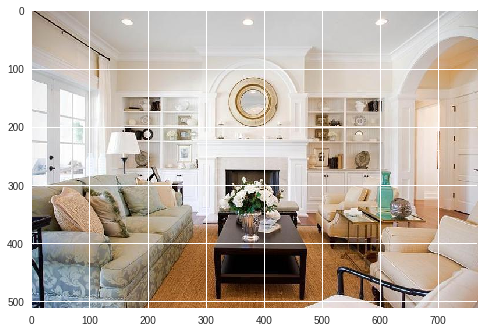

outputimgs/img1.png
Output Image of ADE:		:


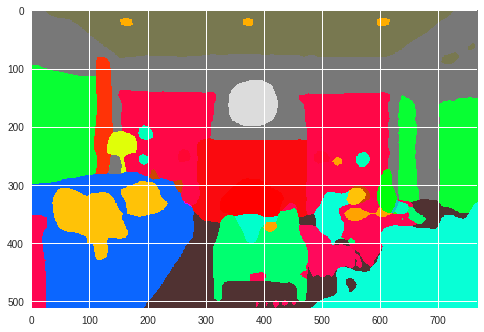

Number of Objects in Image On ADE Dataset:	
Numbers Items in img Using ADE dataset imgs/img1.jpg	:27
------------------------------------------------------

outputvocimgs/img1.png
Output Image of VOC:		:


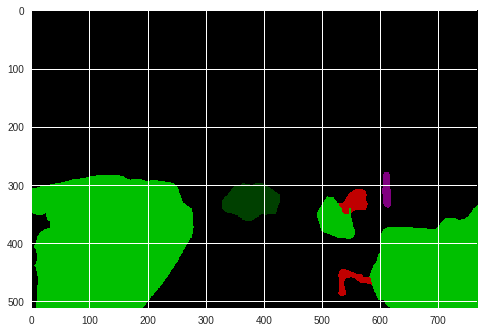

Number of Objects in Image On VOC Dataset:	
Numbers Items in img Using VOC dataset imgs/img1.jpg	:5
------------------------------------------------------

Input Image:		:
imgs/img3.jpg


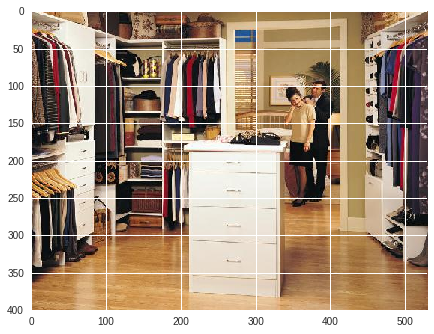

outputimgs/img3.png
Output Image of ADE:		:


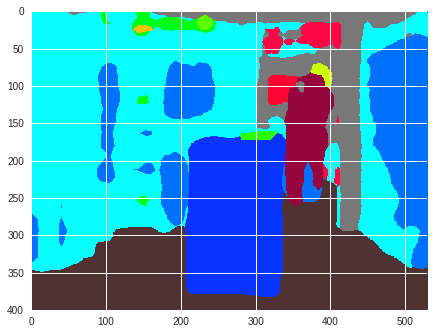

Number of Objects in Image On ADE Dataset:	
Numbers Items in img Using ADE dataset imgs/img3.jpg	:13
------------------------------------------------------

outputvocimgs/img3.png
Output Image of VOC:		:


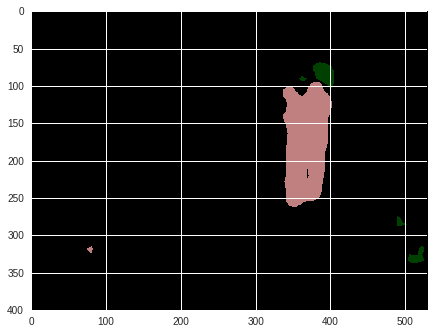

Number of Objects in Image On VOC Dataset:	
Numbers Items in img Using VOC dataset imgs/img3.jpg	:3
------------------------------------------------------

Input Image:		:
imgs/img5.jpeg


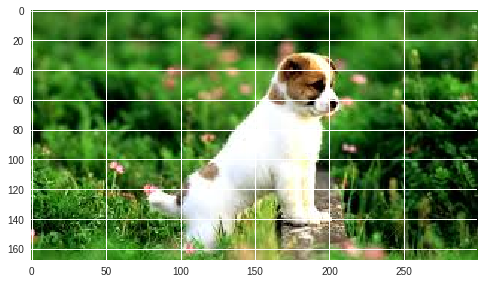

outputimgs/img5.png
Output Image of ADE:		:


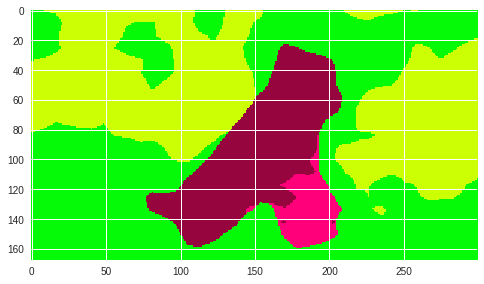

Number of Objects in Image On ADE Dataset:	
Numbers Items in img Using ADE dataset imgs/img5.jpeg	:4
------------------------------------------------------

outputvocimgs/img5.png
Output Image of VOC:		:


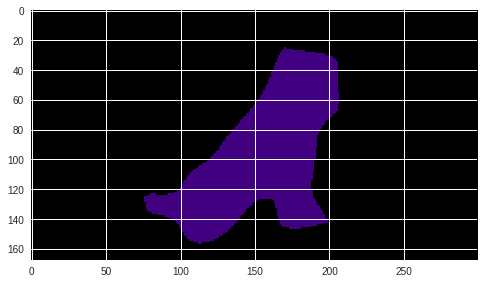

Number of Objects in Image On VOC Dataset:	
Numbers Items in img Using VOC dataset imgs/img5.jpeg	:2
------------------------------------------------------

Input Image:		:
imgs/img4.jpg


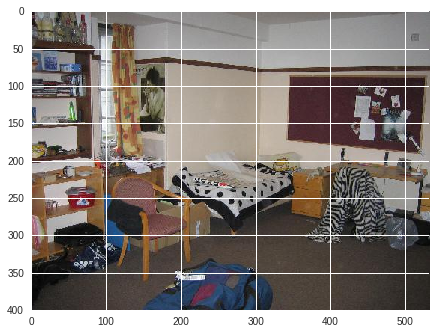

outputimgs/img4.png
Output Image of ADE:		:


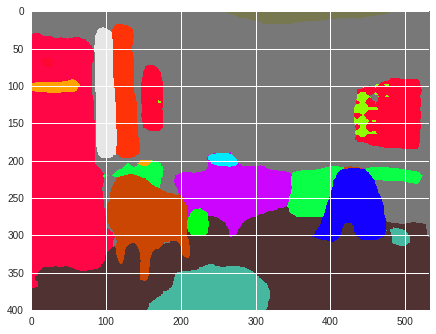

Number of Objects in Image On ADE Dataset:	
Numbers Items in img Using ADE dataset imgs/img4.jpg	:17
------------------------------------------------------

outputvocimgs/img4.png
Output Image of VOC:		:


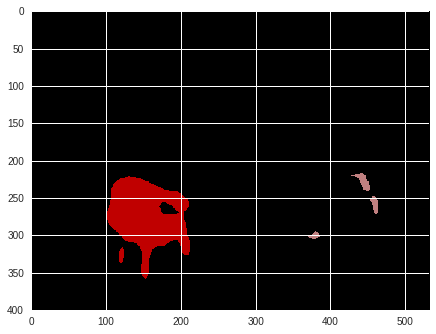

Number of Objects in Image On VOC Dataset:	
Numbers Items in img Using VOC dataset imgs/img4.jpg	:3
------------------------------------------------------

Input Image:		:
imgs/img2.jpg


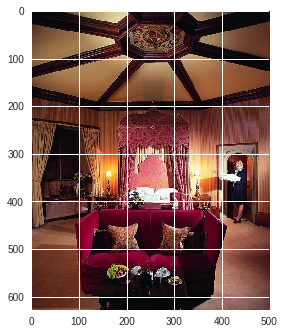

outputimgs/img2.png
Output Image of ADE:		:


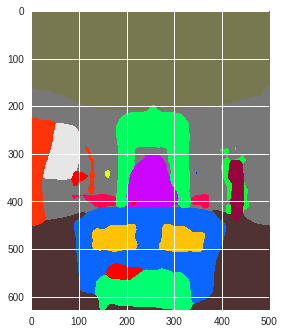

Number of Objects in Image On ADE Dataset:	
Numbers Items in img Using ADE dataset imgs/img2.jpg	:16
------------------------------------------------------

outputvocimgs/img2.png
Output Image of VOC:		:


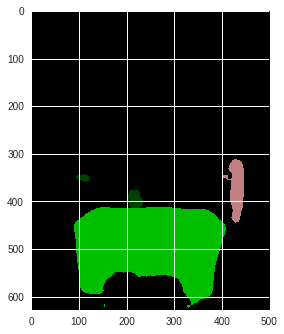

Number of Objects in Image On VOC Dataset:	
Numbers Items in img Using VOC dataset imgs/img2.jpg	:4
------------------------------------------------------



In [0]:
#Input and output images of both dataset
import glob
input_imgs=(glob.glob("imgs/*.*"))
for i in range (0,len(input_imgs)):
    print("Input Image:\t\t:")
    print(input_imgs[i])
    plt.imshow(image.imread(input_imgs[i]).asnumpy())
    plt.show()
    output_img_ade="outputimgs/"+input_imgs[i].split('/')[1].split('.')[0]+'.png'
    output_img_voc="outputvocimgs/"+input_imgs[i].split('/')[1].split('.')[0]+'.png'
    
    print(output_img_ade)
    print("Output Image of ADE:\t\t:")
    plt.imshow(image.imread(output_img_ade).asnumpy())
    plt.show()
    print("Number of Objects in Image On ADE Dataset:\t")
    print(numItems_ade[i])
    print("------------------------------------------------------\n")
    
    print(output_img_voc)
    print("Output Image of VOC:\t\t:")
    plt.imshow(image.imread(output_img_voc).asnumpy())
    plt.show()
    print("Number of Objects in Image On VOC Dataset:\t")
    print(numItems_voc[i])
    print("------------------------------------------------------\n")
    


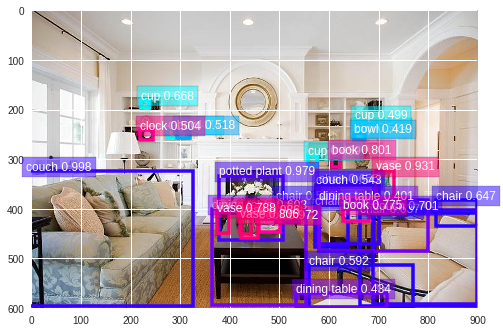

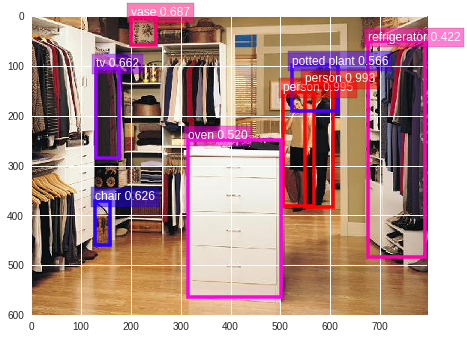

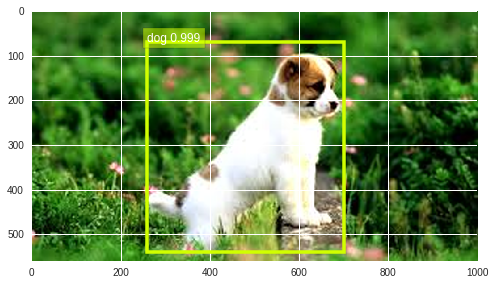

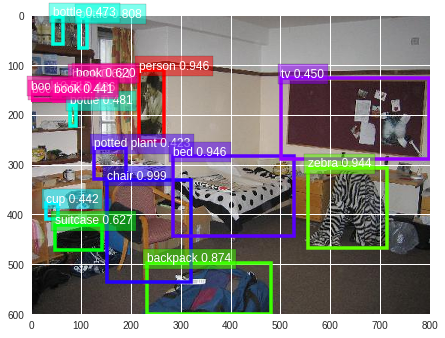

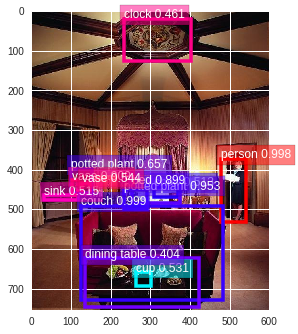

In [0]:
class_names_of_imgs=[]
names_of_imgs=[]
for i in range (0,len(input_imgs)):
    x, orig_img = data.transforms.presets.rcnn.load_test(input_imgs[i])
    box_ids, scores, bboxes = obj_Detection(x)
    ax,class_names = plot_bbox(orig_img, bboxes[0], scores[0], box_ids[0], class_names=obj_Detection.classes)
    class_names_of_imgs.append(class_names)
    names_of_imgs.append(input_imgs[i])
    

In [0]:
print("Objects which we have used:\t")
print(obj_Detection.classes)
print(len((obj_Detection.classes)))

Objects which we have used:	
['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']
80


In [0]:
#Final Comparsion
for i in range(len(numItems_ade)):
    print("------------------------------------------------------")
    print(numItems_ade[i])
    print(numItems_voc[i])
    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print("------------------------------------------------------")
    print("Numbers Objects idenfied in an image {}:\t{}".format(names_of_imgs[i],len(class_names_of_imgs[i])))
    
    class_names_of_img_unique=list(set(class_names_of_imgs[i]))
    print("------------------------------------------------------")
    for j in range(0,len(class_names_of_img_unique)):
   
        print("Number of {}'s -------> :{}".format(class_names_of_img_unique[j],class_names_of_imgs[i].count(class_names_of_img_unique[j])))

    print('+++++++++++++++++++++++++++++++++++++++++++++++++++++')
    print("------------------------------------------------------\n")

------------------------------------------------------
Numbers Items in img Using ADE dataset imgs/img1.jpg	:27
Numbers Items in img Using VOC dataset imgs/img1.jpg	:5
+++++++++++++++++++++++++++++++++++++++++++++++++++++
------------------------------------------------------
Numbers Objects idenfied in an image imgs/img1.jpg:	28
------------------------------------------------------
Number of bowl's -------> :2
Number of cup's -------> :5
Number of potted plant's -------> :1
Number of dining table's -------> :3
Number of couch's -------> :3
Number of book's -------> :3
Number of clock's -------> :1
Number of vase's -------> :4
Number of chair's -------> :6
+++++++++++++++++++++++++++++++++++++++++++++++++++++
------------------------------------------------------

------------------------------------------------------
Numbers Items in img Using ADE dataset imgs/img3.jpg	:13
Numbers Items in img Using VOC dataset imgs/img3.jpg	:3
+++++++++++++++++++++++++++++++++++++++++++++++++++++
--